# Predicting Dutch Speaking Proficiency in Adult Language Learners

This project aims to predict the speaking proficiency of adult learners taking the State Examination of Dutch as a Second Language (STEX) using machine learning models. The dataset, originally compiled by Schepens, van Hout, and Jaeger (2020) and available on [Kaggle](https://www.kaggle.com/datasets/thedevastator/adult-language-learning-profile/data?select=stex.csv), contains anonymized exam results and demographic information of learners residing in the Netherlands.

#### Key features considered include:

- Linguistic background (e.g., native language, language family)
- Demographic factors (e.g., age of arrival, length of residence)
- Education & Enrollment (e.g., prior schooling, education accessibility)
- Personal attributes 

#### The project follows a structured ML pipeline, including:

- Data preprocessing: Cleaning, feature selection, and encoding.
- Model training: Linear Regression, Decision Trees, Random Forest, and Gradient Boosting.
- Model evaluation: Using RMSE and R² to determine predictive accuracy.
- Feature importance analysis: Identifying key factors influencing speaking proficiency.

The results of this study can help policymakers and educators understand the strongest predictors of language learning success, potentially guiding future language programs and interventions.

#### Project Contributors

This project was developed by:
- [Yohan Jair Rivera Farías](https://www.linkedin.com/in/yohan-rivera-12b847261/)
- Fabián Hernando Rivera Farías 

Computer Science students at Unicomfacauca in Popayán, Colombia 🇨🇴 

It was completed as part of their final project for the AI4All elective, under the supervision of Professor [Viviana Márquez](https://www.linkedin.com/in/vivianamarquez/). 

<hr>

# 1. Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/stex.csv", encoding = "ISO-8859-1")

In [3]:
df.head()

L1            C                  L1L2           L2  AaA  LoR  \
0  Afrikaans  SouthAfrica      AfrikaansEnglish      English   25    0   
1  Afrikaans  SouthAfrica       AfrikaansGerman       German   47    2   
2  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual   23   23   
3  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual   42    2   
4  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual   22   19   

   Edu.day     Sex         Family ISO639.3  Enroll  Speaking  morph       lex  \
0      4.0  Female  Indo-European     afr       93       496    NaN  0.010463   
1      4.0    Male  Indo-European     afr       93       542    NaN  0.010463   
2      3.0  Female  Indo-European     afr       93       585    NaN  0.010463   
3      2.0  Female  Indo-European     afr       93       521    NaN  0.010463   
4      3.0  Female  Indo-European     afr       93       639    NaN  0.010463   

   new_feat  new_sounds  
0       NaN         NaN  
1       NaN         NaN  
2       NaN         NaN  
3       NaN         NaN  
4       NaN         NaN

#### Data dictionary provided by OP

|  Name  | Description  |  Type |
|:-------------:|:-------------:|:-----------:|
| **L1**  | Native language of the participant.  | *String* |
| **C**  | Country of origin of the participant.  | *String* |
| **L1L2**  | Linguistic similarity between the native language and the target language.  | *Integer* |
| **AaA**  | Age at arrival in the Netherlands.  | *Integer* |
| **LoR**  | Length of residence in the Netherlands.  | *Integer* |
| **Edu.day**  | Formal education days in the target language.  | *Integer* |
| **Sex**  | Gender of the participant.  | *String* |
| **Family**  | Family status of the participant.  | *String* |
| **ISO639.3**  | ISO 639-3 codes for the target language.  | *String* |
| **Enroll**  | Duration enrolled in language courses.  | *Integer* |
| **Speaking**  | Speaking proficiency test score on the State Examination of Dutch as a Second Language.  | *Integer* |
| **morph**  | Morphological score related to knowledge structures within words.  | *Integer* |
| **lex**  | Lexicon score indicating understanding of written words.  | *Integer* |
| **new_feat**  | Feature score reflecting ability to acquire new sounds/grammatical structures.  | *Integer* |
| **new_sounds**  | Sound symbols score evaluating pronunciation.  | *Integer* |


# 2. Exploratory Data Analysis

In [4]:
print("Number of rows and columns in the dataset")
print(df.shape)

Number of rows and columns in the dataset
(50235, 16)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50235 entries, 0 to 50234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   L1          50235 non-null  object 
 1   C           50235 non-null  object 
 2   L1L2        50235 non-null  object 
 3   L2          50235 non-null  object 
 4   AaA         50235 non-null  int64  
 5   LoR         50235 non-null  int64  
 6   Edu.day     50226 non-null  float64
 7   Sex         50235 non-null  object 
 8   Family      50235 non-null  object 
 9   ISO639.3    50235 non-null  object 
 10  Enroll      50235 non-null  int64  
 11  Speaking    50235 non-null  int64  
 12  morph       48426 non-null  float64
 13  lex         50235 non-null  float64
 14  new_feat    48219 non-null  float64
 15  new_sounds  48219 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 6.1+ MB


In [6]:
print("Descriptive statistics of numerical variables:")
df.describe()

Descriptive statistics of numerical variables:


AaA           LoR       Edu.day        Enroll      Speaking  \
count  50235.000000  50235.000000  50226.000000  50235.000000  50235.000000   
mean      26.487648      3.923002      3.134213     81.147029    517.622275   
std        7.245634      4.275746      0.855379     25.346411     37.917385   
min        0.000000      0.000000      1.000000      8.000000    270.000000   
25%       22.000000      2.000000      3.000000     67.000000    494.000000   
50%       26.000000      3.000000      3.000000     86.000000    516.000000   
75%       30.000000      5.000000      4.000000    100.000000    540.000000   
max       88.000000     59.000000      4.000000    148.000000    685.000000   

              morph           lex      new_feat    new_sounds  
count  48426.000000  50235.000000  48219.000000  48219.000000  
mean       0.050150      0.411063     14.468073     20.117049  
std        0.056546      0.189779      5.645576      3.602436  
min       -0.017100      0.010463      6.000000     13.000000  
25%        0.018300      0.388004     11.000000     19.000000  
50%        0.047900      0.398649     14.000000     21.000000  
75%        0.063800      0.595079     21.000000     23.000000  
max        0.326900      0.595079     32.000000     27.000000

In [7]:
print("Descriptive statistics of categorical variables:")
df.describe(include=['object', 'category'])

Descriptive statistics of categorical variables:


L1        C           L1L2       L2     Sex         Family  \
count    50235    50235          50235    50235   50235          50235   
unique      70      119            737       44       2             14   
top     Arabic  Germany  GermanEnglish  English  Female  Indo-European   
freq      5927     4869           4335    27886   33310          34345   

       ISO639.3  
count     50235  
unique       70  
top        ara   
freq       5927

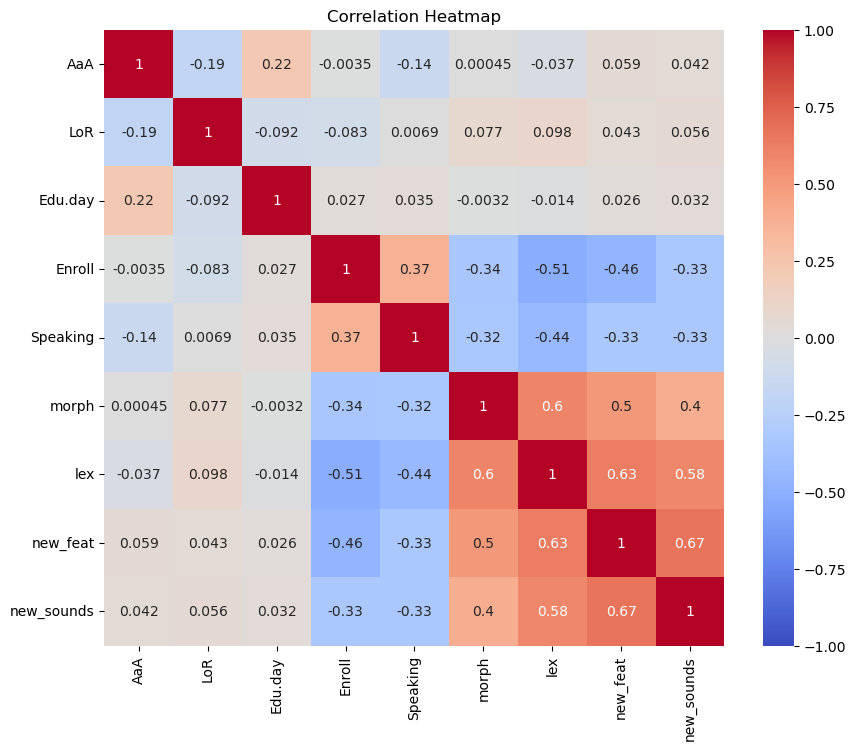

In [8]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap for the numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Insights from the correlation matrix

~~- **Linguistic skills are strongly interconnected**
    - There is a positive correlation between the morphological knowledge (`morph`), lexical knowledge (`lex`), ability to acquire new structures (`new_feat`), and pronunciation skills (`new_sounds`). 
    - This suggest that participants  who excel in understanding word structures (morphology) tend to have stronger vocabulary knowledge (lexicon), while those adept at acquiring new grammatical structures are also better at pronunciation. 
    - Additionally, a strong vocabulary is linked to better pronunciation, suggesting that written and spoken language skills develop together rather than in isolation.~~ Conclusion removed given that we realized the same value was imputed for all speakers of the same native language for these features.
    
    
- **Speaking proficiency develops independently from linguistic skills**
    - Speaking scores (`Speaking`) have negative correlations with morphological knowledge (`morph`), lexical knowledge (`lex`), phonological adaptability (`new_feat`), and and pronunciation (`new_sounds`).
    - Given that these features have the same values for speakers of the same native language, this suggests that linguistic similarity from one's native language does not necessarily translate into better oral fluency in Dutch.
    - This reinforces the idea that language acquisition is influenced by more than just structural similarities—active practice, immersion, and speaking-focused training might be key factors.
    

- **Simply living in the Netherlands won't determine language proficiency**
    - Age at Arrival (`AaA`) and Length of Residence (`LoR`) show very low correlations with most language proficiency metrics. 
    - This suggests that simply living in the Netherlands longer or arriving at an earlier age does not strongly determine speaking proficiency or language skills.
    - Other factors, such as language learning strategies, motivation, and exposure, might play a more significant role.

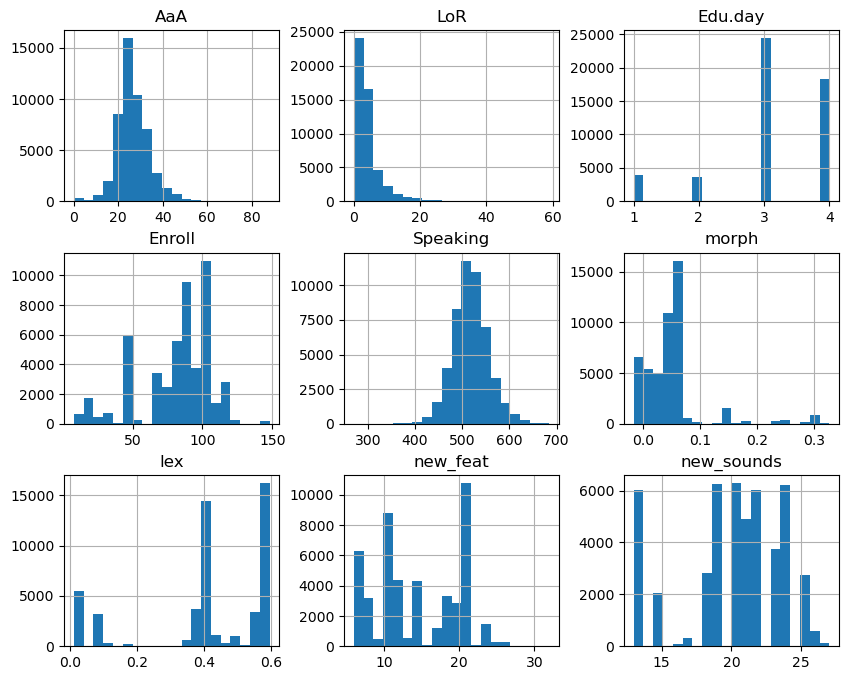

In [9]:
# Histograms for numerical variables
df_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

- Most participants arrived in the Netherlands between ages 20 and 40
- Most participants are recent immigrants, meaning they have spent less than 10 years in the country
- Most participants have had at least 11 years of schooling, with a significant number having 16 or more years. 
- Enrollment in the courses show multiple peaks, suggesting that different groups of learners follow distinct enrollment patterns (some my enroll in shorter courses, while others take extensive language training) 
- Speaking proficiency is normally distributed, meaning that most learners score around the average speaking proficiency 
- Most participants have very low morphological knowledge scores. This could indicate that morphological knowledge is difficult to acquire for second-language learners.
- The two distinct peaks suggest that learners may fall into two groups. This may indicate that some learners have prior exposure to Dutch-like languages, while others do not.
- Pronunciation skills appear to be mostly uniformly spread.This could mean that different learners have very different levels of phonetic adaptation, potentially influenced by their native language’s similarity to Dutch.

From the histograms above, we decided to take a closer look int `lex` and `new_sounds`.

In [10]:
df_filtered = df[df['Family']!='Indo-European']
df_filtered.lex.value_counts()

lex
0.595079    15890
Name: count, dtype: int64

- `lex` is identical (0.595079) for all non-Indo-European languages, this suggests that the dataset might not have real variation in lexical knowledge for these groups.
- It could be due to missing data that was filled with a default value, or a calculated proxy value rather than actual test scores.
- This could bias the results and overestimate the uniformity of lexical knowledge for non-Indo-European learners.
- This will impact our Machine Learning modeling choices later on

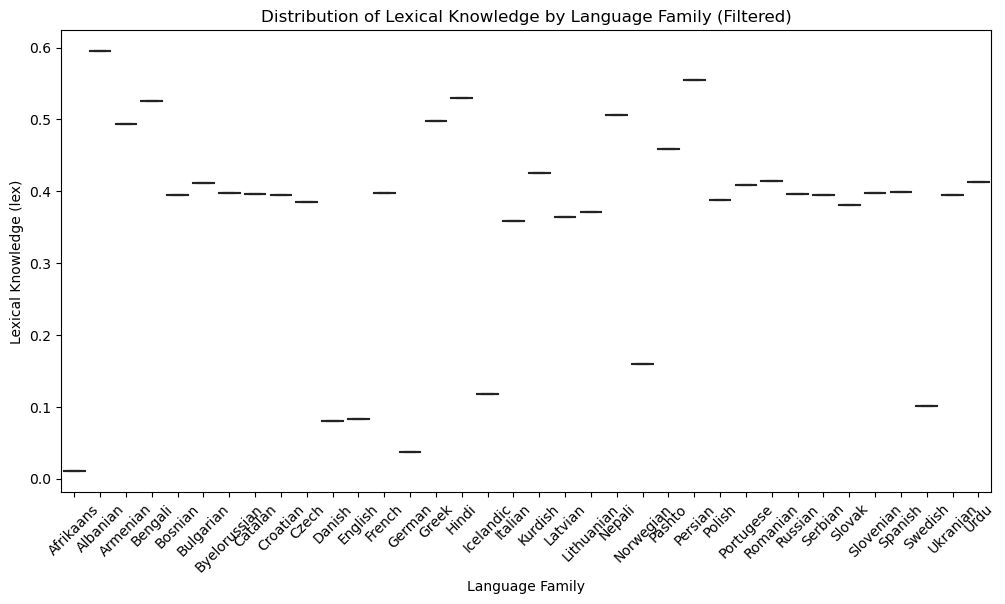

In [11]:
df_filtered = df[df['Family']=='Indo-European']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='L1', y='lex', palette="Reds")

plt.xticks(rotation=45)
plt.xlabel("Language Family")
plt.ylabel("Lexical Knowledge (lex)")
plt.title("Distribution of Lexical Knowledge by Language Family (Filtered)")

plt.show()

- This boxplot shows the distribution of Lexical Knowledge (`lex`) across different native languages. The lack of variation within each native language suggests that every participant from the same native language has the exact same lex score. If `lex` were measured directly from test scores, we would expect some variation within each native language. The fact that all participants from the same native language share the same `lex` score suggests that it was either precomputed based on external linguistic data or categorized rather than measured per individual. This means that models will treat lex as a proxy for native language rather than a real independent predictor. **Therefore, we will drop `lex` from our model.**

Now, let's examine `new_sounds`:

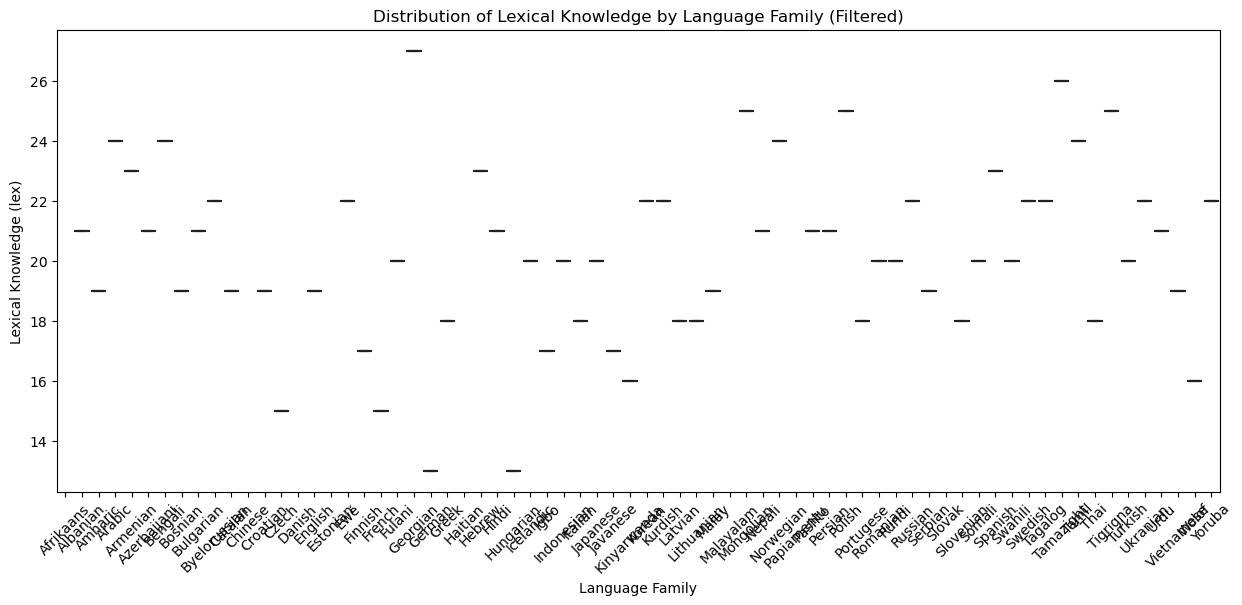

In [12]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='L1', y='new_sounds', palette="Reds")

plt.xticks(rotation=45)
plt.xlabel("Language Family")
plt.ylabel("Lexical Knowledge (lex)")
plt.title("Distribution of Lexical Knowledge by Language Family (Filtered)")

plt.show()

Uh oh, seems like we have the same problem again. What other variables could be displaying the same behaviour? 

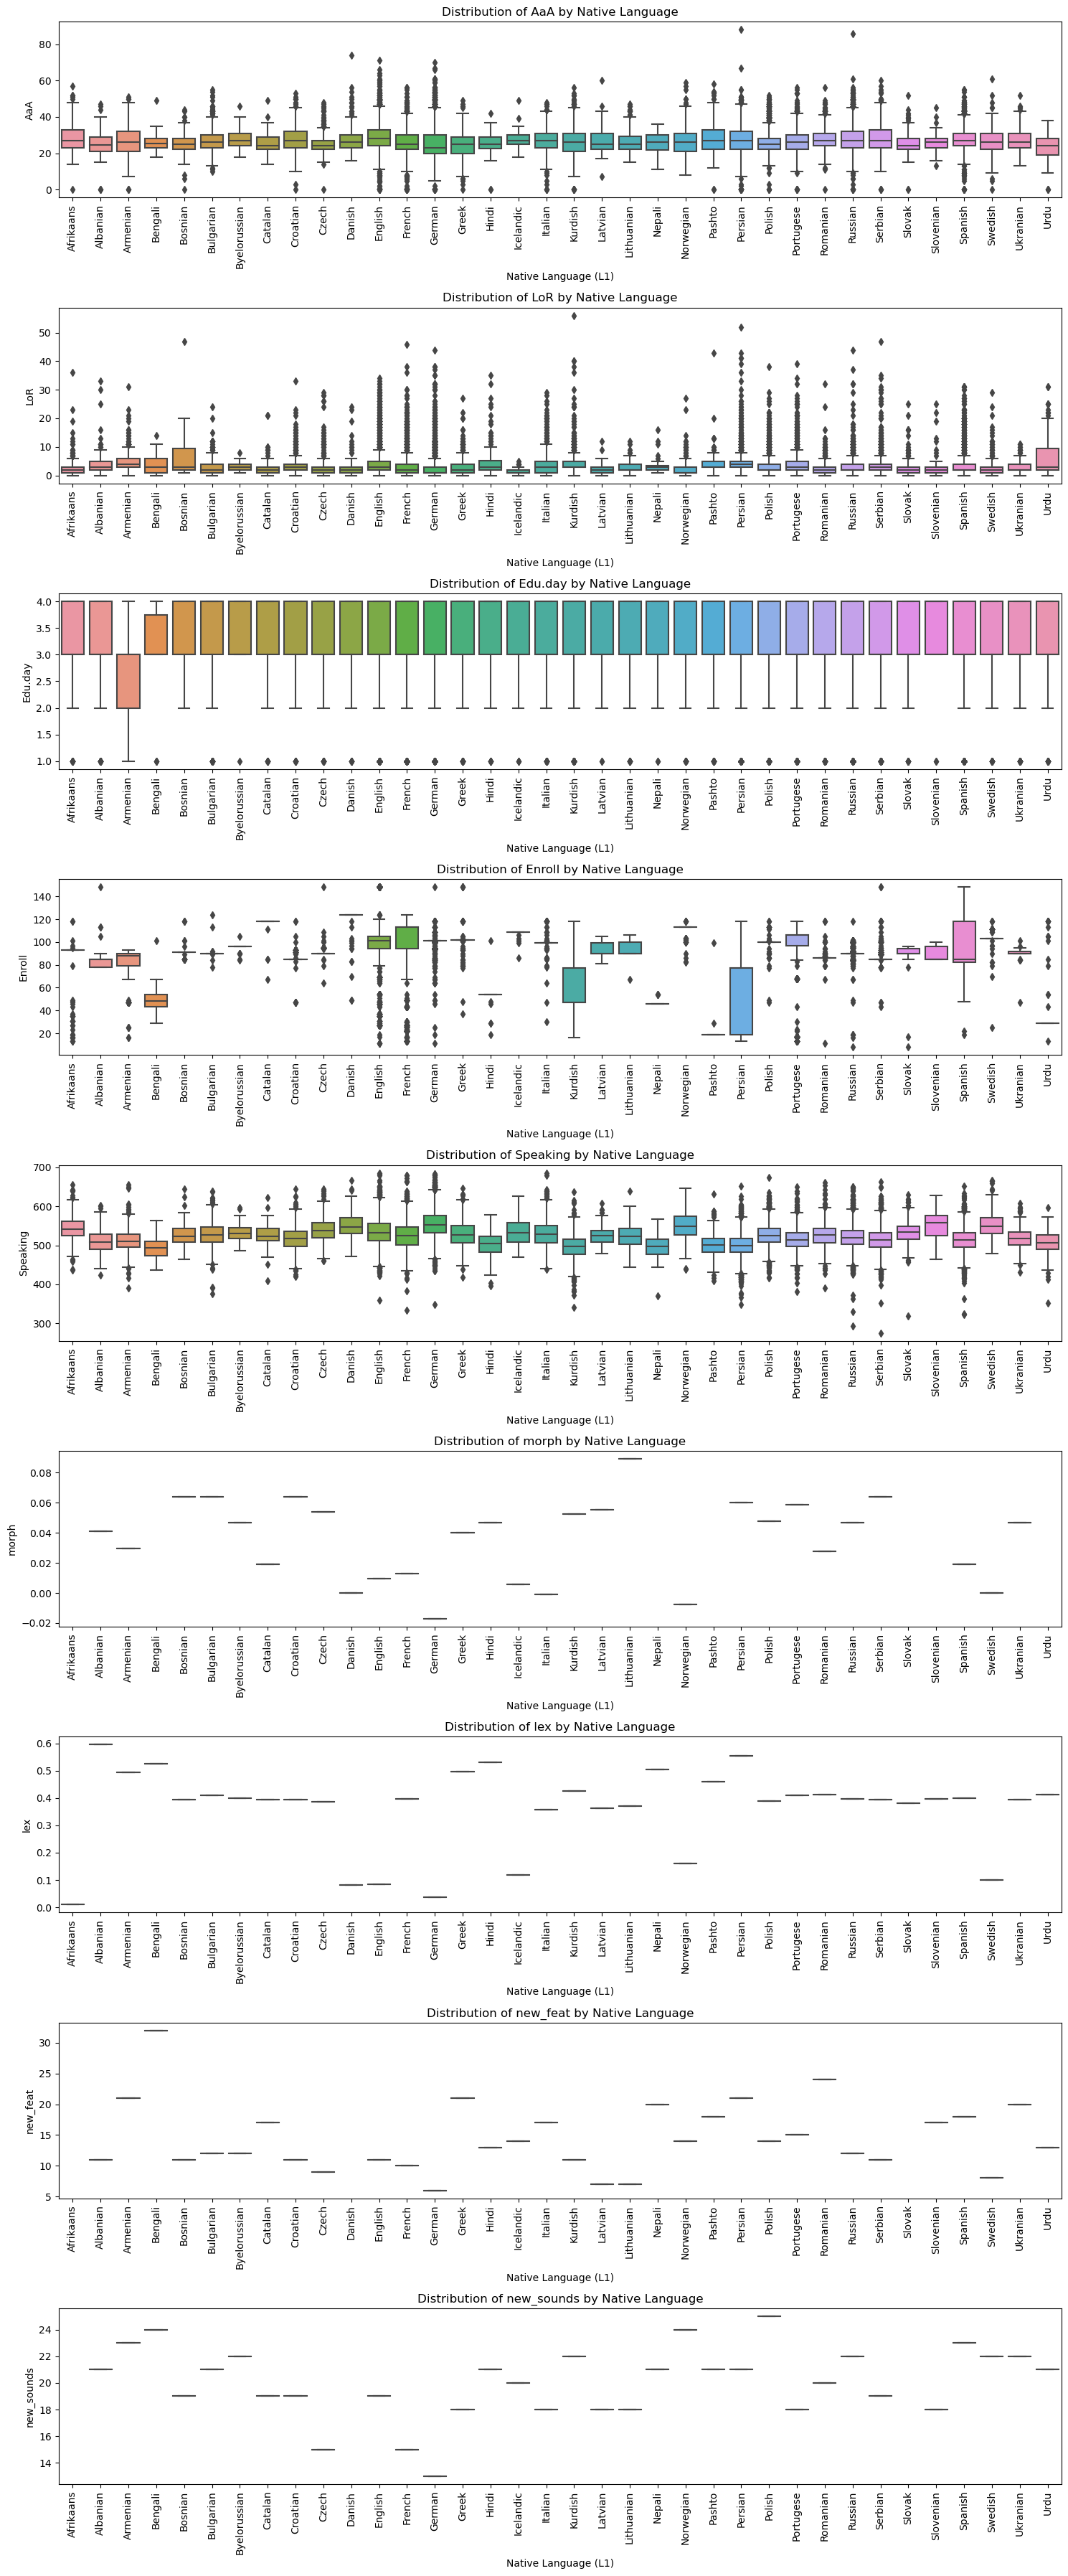

In [13]:
# Select only numerical variables
numerical_columns = df_filtered.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df_filtered, x='L1', y=col)
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.xlabel("Native Language (L1)")
    plt.ylabel(col)
    plt.title(f"Distribution of {col} by Native Language")

plt.tight_layout()
plt.show()

The fact that all participants from the same native language share the same `morph`, `lex`, `new_feat`, and `new_sounds` scores suggests that these metrics were not measured per individual. To avoid models that will treat those variables as a proxy for native language rather than a real independent predictor, **we will drop them from our model.**

In [14]:
to_drop = ['morph', 'lex', 'new_feat', 'new_sounds']
df = df.drop(columns=to_drop)

In [15]:
# New dataset
df.head()

L1            C                  L1L2           L2  AaA  LoR  \
0  Afrikaans  SouthAfrica      AfrikaansEnglish      English   25    0   
1  Afrikaans  SouthAfrica       AfrikaansGerman       German   47    2   
2  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual   23   23   
3  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual   42    2   
4  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual   22   19   

   Edu.day     Sex         Family ISO639.3  Enroll  Speaking  
0      4.0  Female  Indo-European     afr       93       496  
1      4.0    Male  Indo-European     afr       93       542  
2      3.0  Female  Indo-European     afr       93       585  
3      2.0  Female  Indo-European     afr       93       521  
4      3.0  Female  Indo-European     afr       93       639

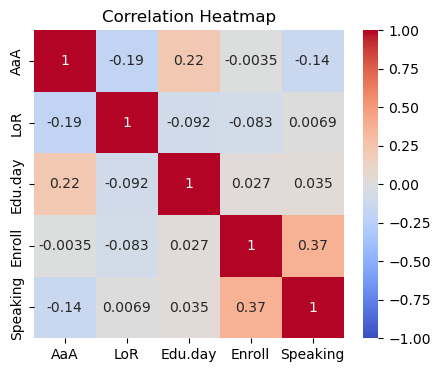

In [16]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Additional insights:
- Time spent in language courses (`Enroll`) is positively correlated with speaking proficiency (`Speaking`). This suggests that longer participation in formal language courses is associated with higher speaking scores. However, correlation does not imply causation—this could mean that dedicated learners enroll longer, rather than courses directly improving proficiency.
- Age at Arrival (`AaA`) has a weak negative correlation with `Speaking`. This indicates that arriving in the Netherlands at an older age is slightly associated with lower speaking proficiency. However, the correlation is weak, meaning age alone is not a strong predictor of language learning success.
- General education level (`Edu.day`) has a weak positive correlation with `Speaking`. This suggests that individuals with more years of formal education tend to have slightly higher speaking proficiency. However, since the correlation is weak, this implies that general education alone is not a strong determinant of language learning success—factors like language exposure, motivation, and practice likely play a bigger role.

In [17]:
df.isnull().sum()

L1          0
C           0
L1L2        0
L2          0
AaA         0
LoR         0
Edu.day     9
Sex         0
Family      0
ISO639.3    0
Enroll      0
Speaking    0
dtype: int64

In [18]:
df = df.dropna() # Only a few missing values, we can remove them

In [19]:
# Select only categorical features
df_categorical = df.select_dtypes(include=['object', 'category'])

df_categorical.head()

L1            C                  L1L2           L2     Sex  \
0  Afrikaans  SouthAfrica      AfrikaansEnglish      English  Female   
1  Afrikaans  SouthAfrica       AfrikaansGerman       German    Male   
2  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual  Female   
3  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual  Female   
4  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual  Female   

          Family ISO639.3  
0  Indo-European     afr   
1  Indo-European     afr   
2  Indo-European     afr   
3  Indo-European     afr   
4  Indo-European     afr

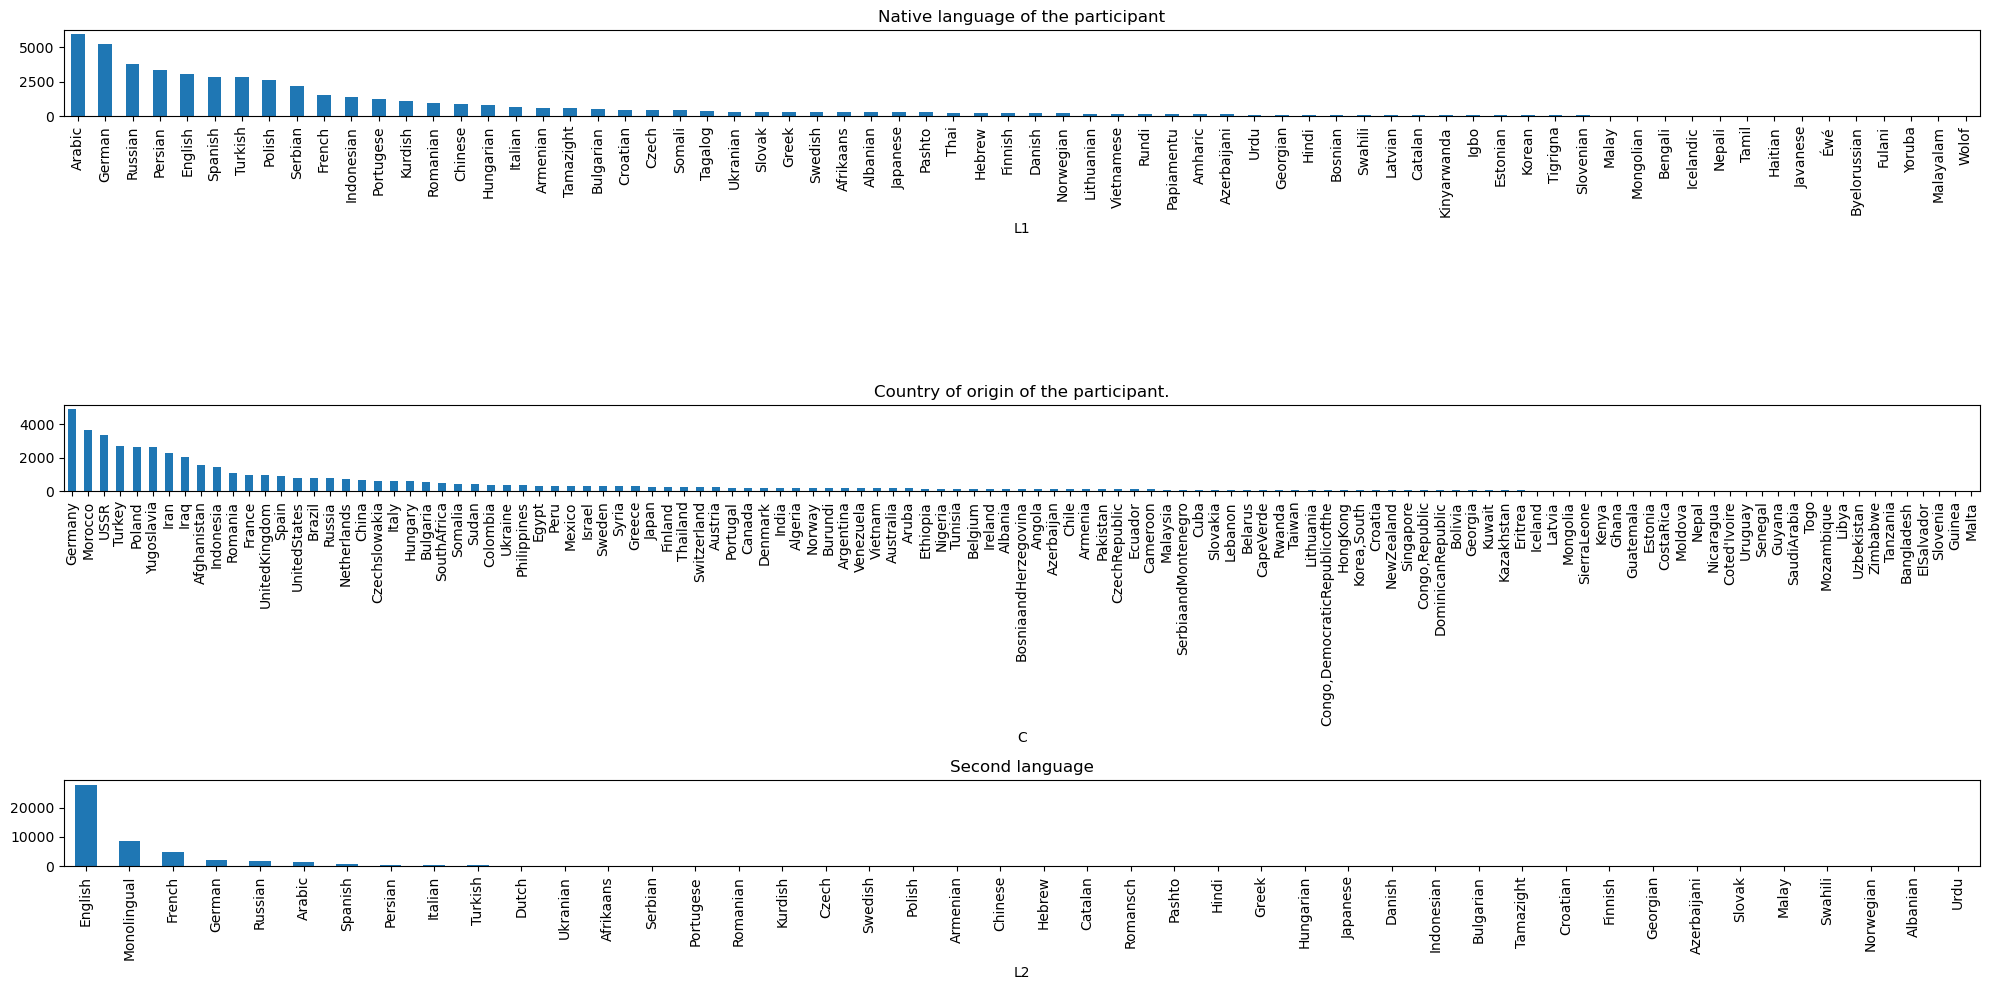

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))

df['L1'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Native language of the participant')

df['C'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Country of origin of the participant.')

df['L2'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Second language')

plt.tight_layout()
plt.show()

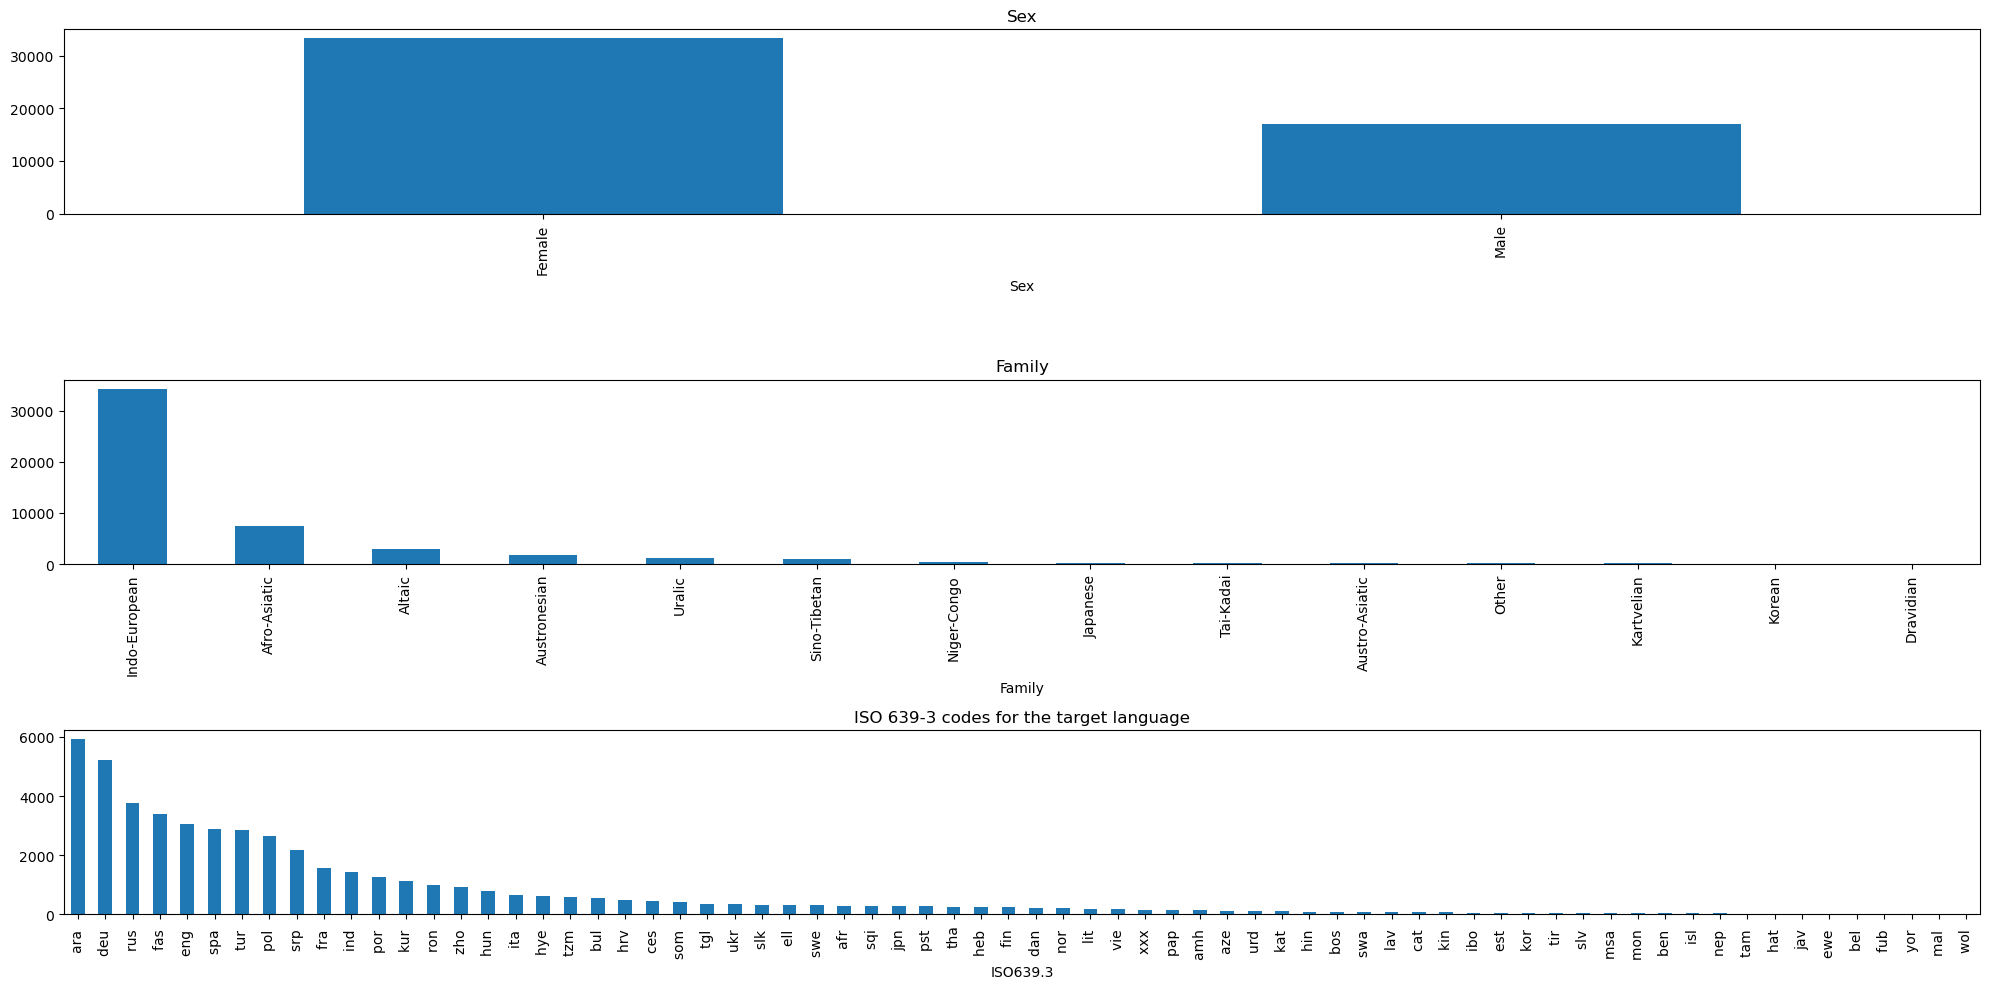

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))

df['Sex'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Sex')

df['Family'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Family')

df['ISO639.3'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('ISO 639-3 codes for the target language')

plt.tight_layout()
plt.show()

In [22]:
df['ISO639.3'].value_counts()

ISO639.3
ara     5927
deu     5226
rus     3770
fas     3382
eng     3040
        ... 
bel       26
fub       23
yor       23
mal       21
wol       17
Name: count, Length: 70, dtype: int64

In [23]:
df['L1'].value_counts()

L1
Arabic          5927
German          5226
Russian         3770
Persian         3382
English         3040
                ... 
Byelorussian      26
Fulani            23
Yoruba            23
Malayalam         21
Wolof             17
Name: count, Length: 70, dtype: int64

- `ISO639.3` and `L1` are repeated features. We'll drop one of them.

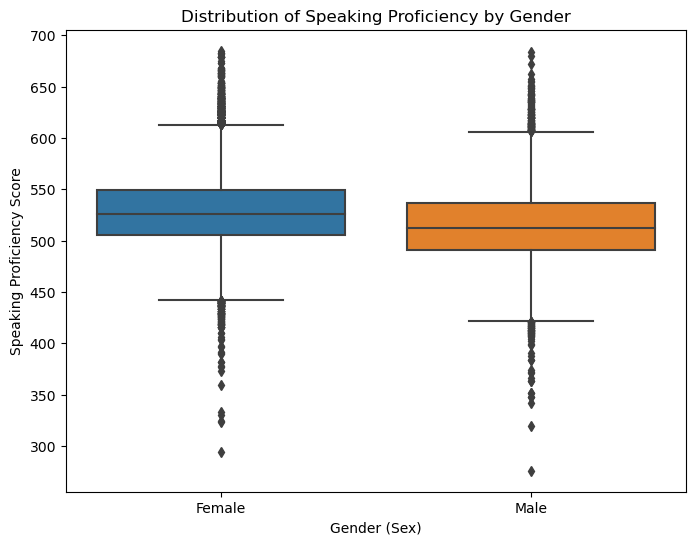

In [24]:
# Create a boxplot for Speaking scores by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, x='Sex', y='Speaking')

# Labels and title
plt.xlabel("Gender (Sex)")
plt.ylabel("Speaking Proficiency Score")
plt.title("Distribution of Speaking Proficiency by Gender")

# Show the plot
plt.show()

- We have considered the ethical implications of incorporating gender in a machine learning model. By excluding gender as a feature, we aim to prevent the model from learning potentially biased patterns or making unfair assumptions about language proficiency based on gender. This ensures that predictions remain fair and equitable for all learners.

In [25]:
to_drop = ['Sex', 'ISO639.3']
df = df.drop(columns=to_drop)

In [26]:
df.head()

L1            C                  L1L2           L2  AaA  LoR  \
0  Afrikaans  SouthAfrica      AfrikaansEnglish      English   25    0   
1  Afrikaans  SouthAfrica       AfrikaansGerman       German   47    2   
2  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual   23   23   
3  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual   42    2   
4  Afrikaans  SouthAfrica  AfrikaansMonolingual  Monolingual   22   19   

   Edu.day         Family  Enroll  Speaking  
0      4.0  Indo-European      93       496  
1      4.0  Indo-European      93       542  
2      3.0  Indo-European      93       585  
3      2.0  Indo-European      93       521  
4      3.0  Indo-European      93       639

The `FamilySpecific` variable is introduced to provide a more precise linguistic classification than the broad `Family` category. We hope to get a better understanding of how a learner’s native language influences Dutch proficiency. 

In [27]:
# Dictionary to map languages (L1) to their respective Indo-European subfamilies
language_family_dict = {
    # Germanic Branch
    "German": "Germanic", "English": "Germanic", "Afrikaans": "Germanic",
    "Danish": "Germanic", "Norwegian": "Germanic", "Swedish": "Germanic",
    "Icelandic": "Germanic",
    
    # Romance Branch
    "Spanish": "Romance", "French": "Romance", "Portugese": "Romance",
    "Romanian": "Romance", "Italian": "Romance", "Catalan": "Romance",
    
    # Slavic Branch
    "Russian": "Slavic", "Polish": "Slavic", "Serbian": "Slavic",
    "Bulgarian": "Slavic", "Croatian": "Slavic", "Czech": "Slavic",
    "Ukranian": "Slavic", "Slovak": "Slavic", "Bosnian": "Slavic",
    "Slovenian": "Slavic", "Byelorussian": "Slavic",
    
    # Indo-Iranian Branch
    "Persian": "Indo-Iranian", "Pashto": "Indo-Iranian",
    "Hindi": "Indo-Iranian", "Urdu": "Indo-Iranian",
    "Bengali": "Indo-Iranian", "Nepali": "Indo-Iranian",
    "Kurdish": "Indo-Iranian",
    
    # Baltic Branch
    "Lithuanian": "Baltic", "Latvian": "Baltic",
    
    # Others
    "Greek": "Other Indo-European",
    "Armenian": "Other Indo-European",
    "Albanian": "Other Indo-European",
}

In [28]:
df['FamilySpecific'] = df.apply(lambda row: language_family_dict.get(row['L1'], row['Family']), axis=1)

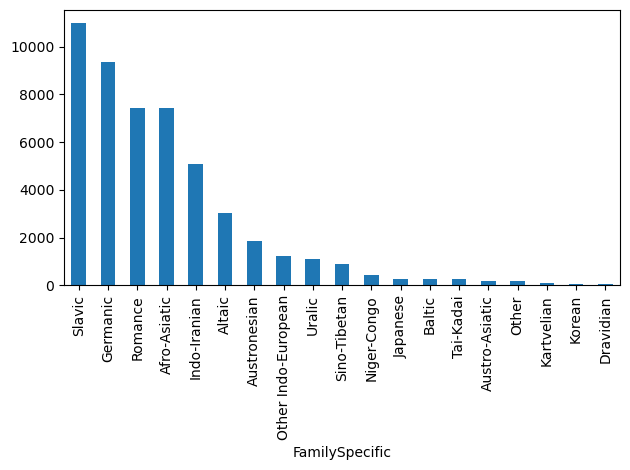

In [29]:
df['FamilySpecific'].value_counts().plot(kind='bar')

plt.tight_layout()
plt.show()

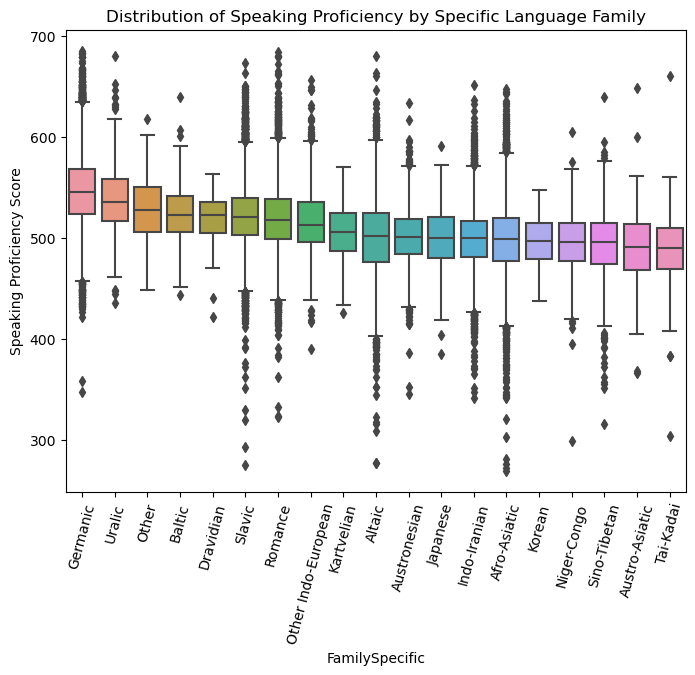

In [30]:
# Compute the median Speaking score for each FamilySpecific group
median_order = df.groupby("FamilySpecific")["Speaking"].median().sort_values(ascending=False).index

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='FamilySpecific', y='Speaking', order=median_order)

plt.xticks(rotation=75)
plt.ylabel("Speaking Proficiency Score")
plt.title("Distribution of Speaking Proficiency by Specific Language Family")

plt.show()

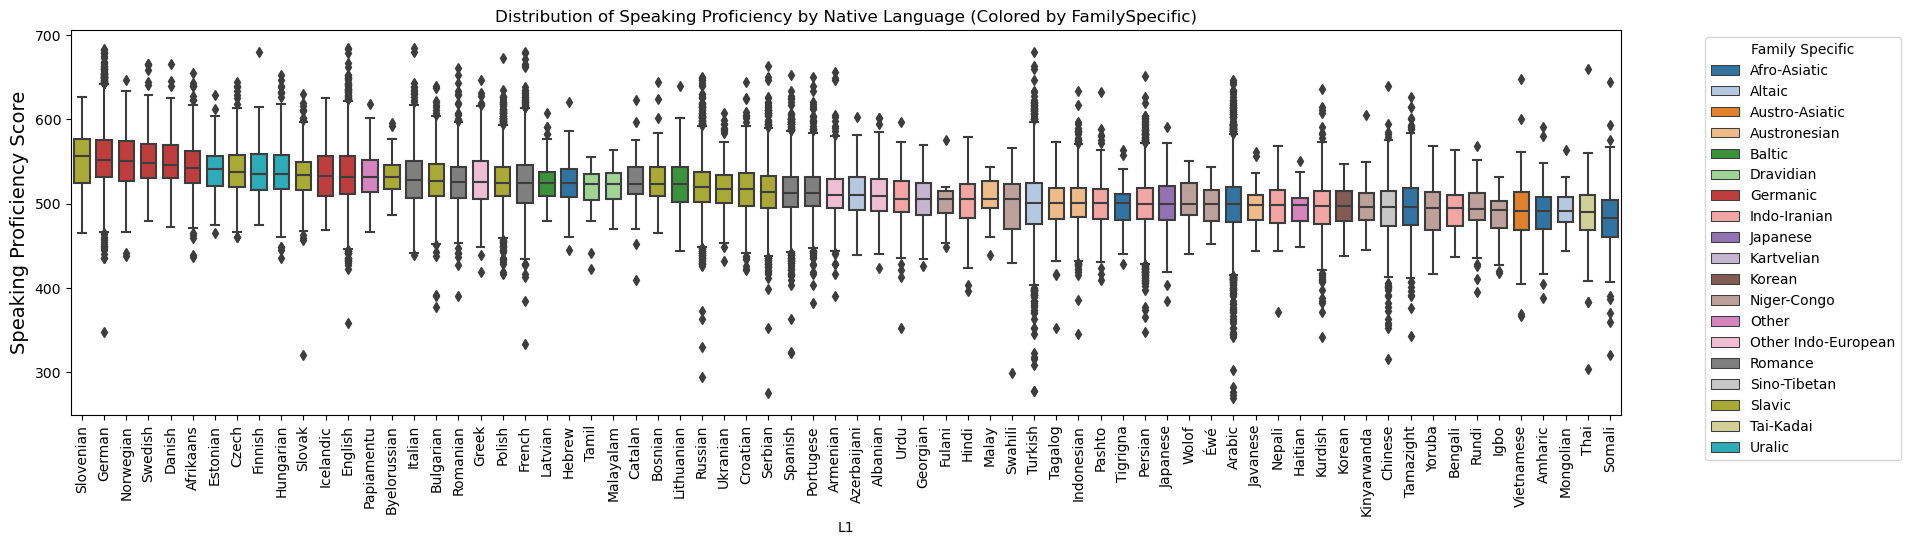

In [31]:
# Ensure FamilySpecific is a categorical variable
df["FamilySpecific"] = df["FamilySpecific"].astype("category")

# Compute the median Speaking score for each L1 group (sorting)
median_order = df.groupby("L1")["Speaking"].median().sort_values(ascending=False).index

# Melt the DataFrame to long format for Seaborn compatibility
melted_df = df[['L1', 'Speaking', 'FamilySpecific']].melt(id_vars=['L1', 'FamilySpecific'], var_name="Variable", value_name="Score")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 5))

# Define a custom color palette for FamilySpecific categories
palette = sns.color_palette("tab20", n_colors=df["FamilySpecific"].nunique())

# Create a boxplot with FamilySpecific as hue
sns.boxplot(data=melted_df, x='L1', y='Score', hue='FamilySpecific', order=median_order, palette=palette, width=0.7, dodge=False, ax=ax)

# Remove the legend since colors already indicate FamilySpecific
ax.legend_.remove()

# Improve readability
ax.set_ylabel("Speaking Proficiency Score", fontsize=14)
ax.set_title("Distribution of Speaking Proficiency by Native Language (Colored by FamilySpecific)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend for FamilySpecific colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Family Specific", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


- The Germanic languages (e.g., German, English, Dutch, Swedish, Norwegian, Danish) tend to have higher median Speaking scores.
- This aligns with expectations since Dutch is a Germanic language, making it easier for speakers of closely related languages to acquire Dutch-speaking skills.
- Uralic languages and some slavic languages also perform well. Possible reasons: Strong language education systems, multilingual exposure, or high motivation.

Likewise, for `L2` we are interested in whether the person is monolingual or not

In [32]:
df['Monolingual'] = df['L2'].apply(lambda row: 'Monolingual' if row=='Monolingual' else 'Multilingual')

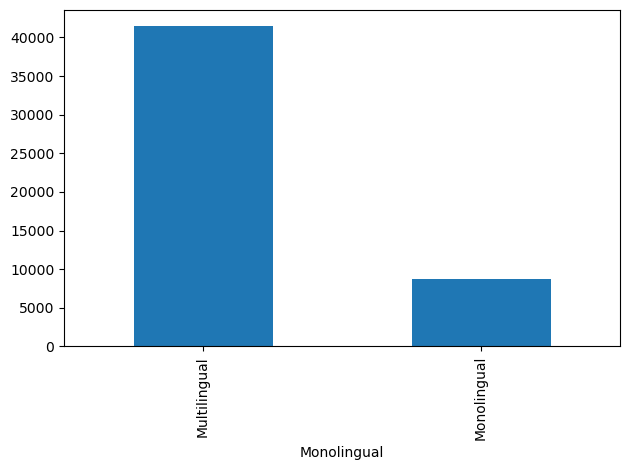

In [33]:
df['Monolingual'].value_counts().plot(kind='bar')

plt.tight_layout()
plt.show()

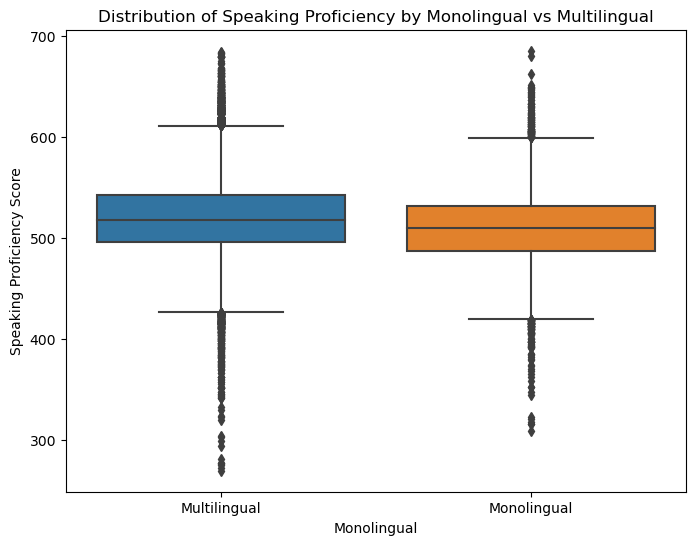

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Monolingual', y='Speaking')

plt.ylabel("Speaking Proficiency Score")
plt.title("Distribution of Speaking Proficiency by Monolingual vs Multilingual")

plt.show()

Multilingual people are in general sligthly better at `Speaking` than monolingual people. 

/Users/vivianamarquez/anaconda3/envs/c1_da/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


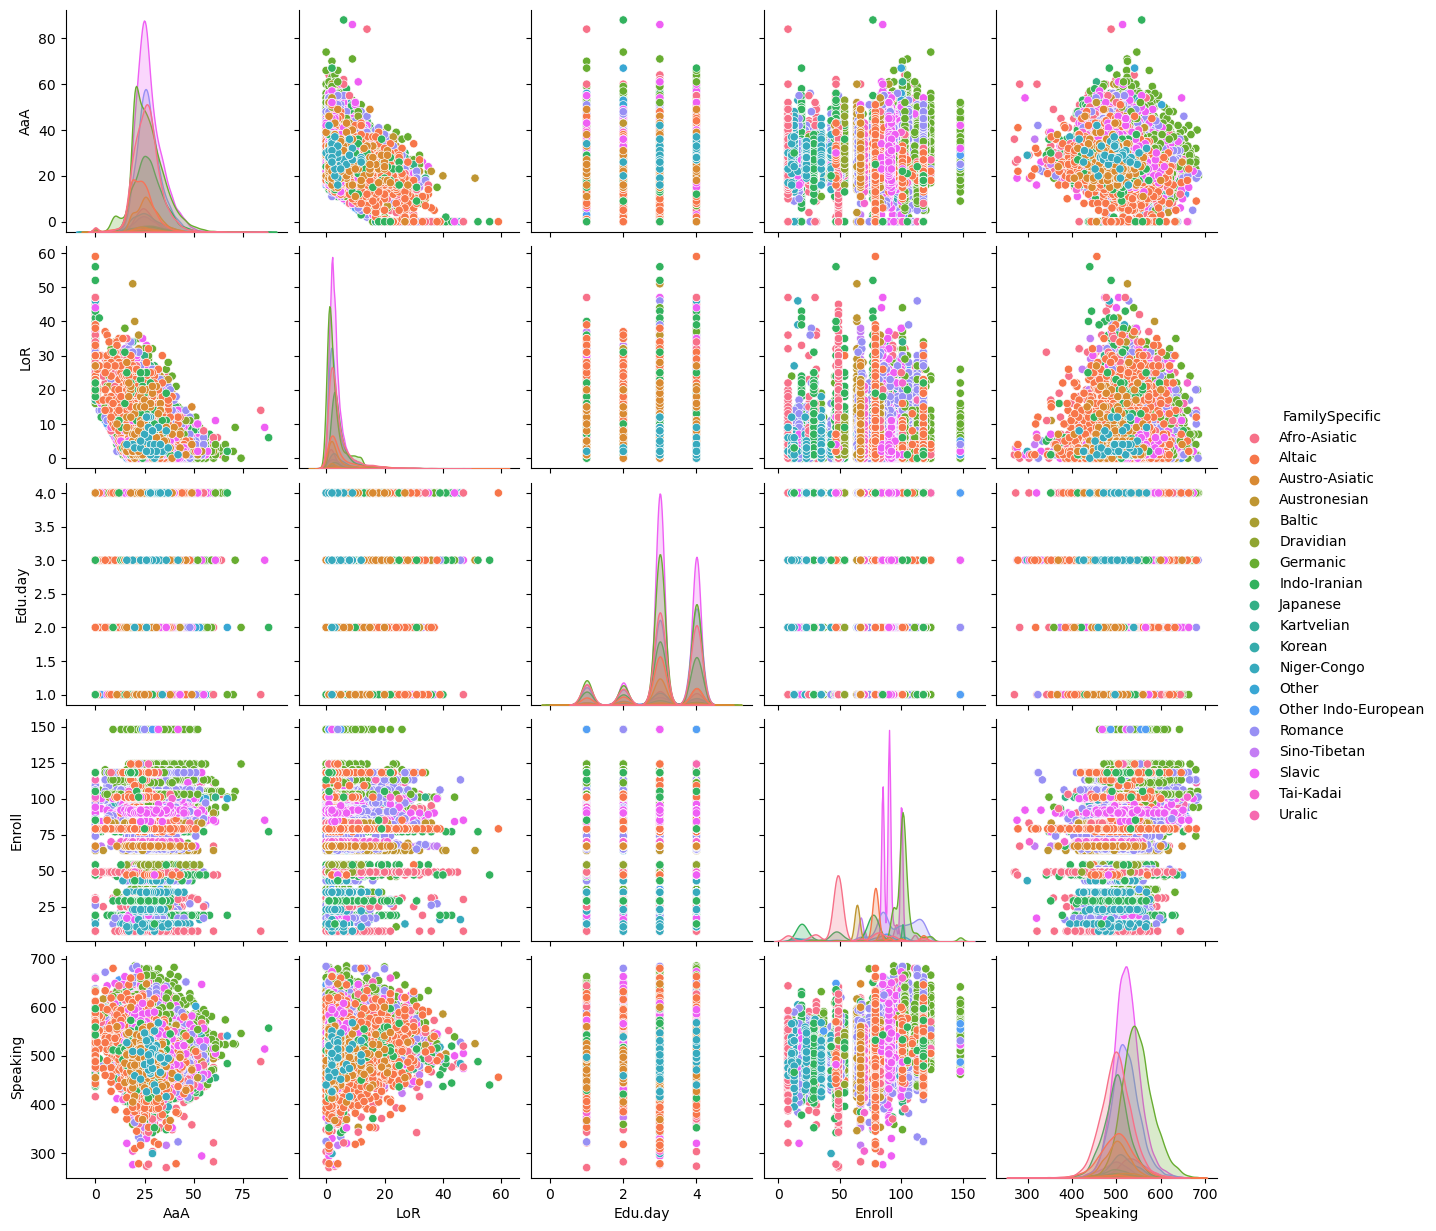

In [35]:
sns.pairplot(df, hue="FamilySpecific")
plt.show()

In [36]:
df = df.drop('L1L2', axis=1) # Dropping L1L2 since it's the same info as L1 and L2

In [37]:
df.head()

L1            C           L2  AaA  LoR  Edu.day         Family  \
0  Afrikaans  SouthAfrica      English   25    0      4.0  Indo-European   
1  Afrikaans  SouthAfrica       German   47    2      4.0  Indo-European   
2  Afrikaans  SouthAfrica  Monolingual   23   23      3.0  Indo-European   
3  Afrikaans  SouthAfrica  Monolingual   42    2      2.0  Indo-European   
4  Afrikaans  SouthAfrica  Monolingual   22   19      3.0  Indo-European   

   Enroll  Speaking FamilySpecific   Monolingual  
0      93       496       Germanic  Multilingual  
1      93       542       Germanic  Multilingual  
2      93       585       Germanic   Monolingual  
3      93       521       Germanic   Monolingual  
4      93       639       Germanic   Monolingual

# 3. Train/Test split

Splitting your dataset is crucial to evaluate model generalization by ensuring that the model learns from a training set and is tested on a separate unseen test set, preventing overfitting and providing a reliable measure of performance on new data.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

In [39]:
X = df.drop(columns=['Speaking'])  
y = df['Speaking']  

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (40180, 10). Training labels size: (40180,)
Test set size: (10046, 10). Test labels size: (10046,)


# 4. Feature Engineering

In [42]:
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

In [43]:
categorical_columns

Index(['L1', 'C', 'L2', 'Family', 'FamilySpecific', 'Monolingual'], dtype='object')

In [44]:
numerical_columns

Index(['AaA', 'LoR', 'Edu.day', 'Enroll'], dtype='object')

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_columns),  # Standardize numerical features
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns)  # One-hot encode categorical features
    ])

In [46]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [47]:
# The names of the numerical columns do not change after the transformation
numerical_column_names = numerical_columns

# The get_feature_names_out method generates the names of the new columns created by OneHotEncoder for categorical columns
categorical_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine the names of numerical and categorical columns into a list
all_column_names = list(numerical_column_names) + list(categorical_column_names)

In [48]:
# Convert the matrix into a DataFrame with the column names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_column_names)

# Display the first few rows of the processed DataFrame
X_train_processed_df.head()

AaA  LoR  Edu.day    Enroll  L1_Albanian  L1_Amharic  L1_Arabic  \
0  2.00  0.0      1.0 -2.030303          0.0         0.0        0.0   
1  0.25 -1.0      0.0  0.212121          0.0         0.0        0.0   
2  0.25  0.0     -2.0  0.454545          0.0         0.0        0.0   
3 -0.75 -0.5      1.0 -0.272727          0.0         0.0        0.0   
4 -2.00  9.0     -1.0 -1.121212          0.0         0.0        0.0   

   L1_Armenian  L1_Azerbaijani  L1_Bengali  ...  FamilySpecific_Korean  \
0          0.0             0.0         0.0  ...                    0.0   
1          0.0             0.0         0.0  ...                    0.0   
2          0.0             0.0         0.0  ...                    0.0   
3          0.0             0.0         0.0  ...                    0.0   
4          0.0             0.0         0.0  ...                    0.0   

   FamilySpecific_Niger-Congo  FamilySpecific_Other  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   

   FamilySpecific_Other Indo-European  FamilySpecific_Romance  \
0                                 0.0                     0.0   
1                                 0.0                     0.0   
2                                 0.0                     0.0   
3                                 0.0                     0.0   
4                                 0.0                     0.0   

   FamilySpecific_Sino-Tibetan  FamilySpecific_Slavic  \
0                          0.0                    0.0   
1                          0.0                    0.0   
2                          0.0                    0.0   
3                          0.0                    0.0   
4                          0.0                    0.0   

   FamilySpecific_Tai-Kadai  FamilySpecific_Uralic  Monolingual_Multilingual  
0                       0.0                    0.0                       1.0  
1                       0.0                    0.0                       1.0  
2                       0.0                    0.0                       1.0  
3                       0.0                    0.0                       1.0  
4                       0.0                    0.0                       0.0  

[5 rows x 266 columns]

In [49]:
# Convert the matrix into a DataFrame with the column names
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_column_names)

# Display the first few rows of the processed test DataFrame
X_test_processed_df.head()

AaA  LoR  Edu.day    Enroll  L1_Albanian  L1_Amharic  L1_Arabic  \
0 -0.750 -1.0      0.0  0.454545          0.0         0.0        0.0   
1  0.875  0.5      0.0 -2.030303          0.0         0.0        0.0   
2 -0.125  0.5      0.0 -0.212121          0.0         0.0        1.0   
3  2.500  0.5      1.0 -1.181818          0.0         0.0        1.0   
4  0.875 -1.0      1.0  0.575758          0.0         0.0        0.0   

   L1_Armenian  L1_Azerbaijani  L1_Bengali  ...  FamilySpecific_Korean  \
0          0.0             0.0         0.0  ...                    0.0   
1          0.0             0.0         0.0  ...                    0.0   
2          0.0             0.0         0.0  ...                    0.0   
3          0.0             0.0         0.0  ...                    0.0   
4          0.0             0.0         0.0  ...                    0.0   

   FamilySpecific_Niger-Congo  FamilySpecific_Other  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   

   FamilySpecific_Other Indo-European  FamilySpecific_Romance  \
0                                 0.0                     0.0   
1                                 0.0                     0.0   
2                                 0.0                     0.0   
3                                 0.0                     0.0   
4                                 0.0                     0.0   

   FamilySpecific_Sino-Tibetan  FamilySpecific_Slavic  \
0                          0.0                    0.0   
1                          0.0                    0.0   
2                          0.0                    0.0   
3                          0.0                    0.0   
4                          0.0                    0.0   

   FamilySpecific_Tai-Kadai  FamilySpecific_Uralic  Monolingual_Multilingual  
0                       0.0                    0.0                       1.0  
1                       0.0                    0.0                       0.0  
2                       0.0                    0.0                       1.0  
3                       0.0                    0.0                       1.0  
4                       0.0                    0.0                       0.0  

[5 rows x 266 columns]

# 5. Regression Modeling

This is a regression problem because we are predicting a score (Speaking Proficiency), which can take any value within a range, rather than assigning a fixed category like "beginner" or "advanced."

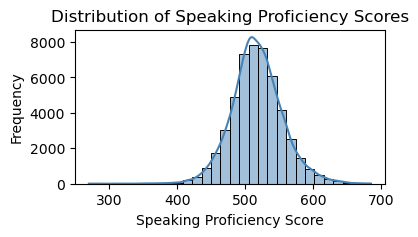

In [50]:
plt.figure(figsize=(4, 2))
sns.histplot(df['Speaking'], kde=True, bins=30, color="steelblue")

plt.xlabel("Speaking Proficiency Score")
plt.ylabel("Frequency")
plt.title("Distribution of Speaking Proficiency Scores")

plt.show()

In [51]:
df.Speaking.describe()

count    50226.000000
mean       517.621451
std         37.917945
min        270.000000
25%        494.000000
50%        516.000000
75%        540.000000
max        685.000000
Name: Speaking, dtype: float64

We will start with the following models:
- Linear Regression 
- Lasso Regresion 
- Huber Regressor 
- Support Vector Machine
- Decision Tree
- Ranfom Forest 
- Gradient Boosting 
- Ada Boost 
- Multi-layer perceptron 

In [52]:
from sklearn.linear_model import LinearRegression, Lasso, HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Huber Regressor": HuberRegressor(max_iter=500),
    "Support Vector Machine": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ada Boost": AdaBoostRegressor(),
    "Multi-layer Perceptron": MLPRegressor(max_iter=1000, batch_size=32, early_stopping=True)

}

Using cross-validation so we can estimate how well a model will generalize to unseen data before actually testing it on the real test set. 

In [54]:
# Define cross-validation strategy (5-fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []
trained_models = {}

for name, model in models.items():
    print(f"Training {model} ...")
    
    # Perform cross-validation and compute RMSE for training
    cv_rmse_train = np.sqrt(-cross_val_score(model, X_train_processed_df, y_train, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1))
    cv_r2_train = cross_val_score(model, X_train_processed_df, y_train, scoring="r2", cv=cv, n_jobs=-1)

    # Train the model on full training data and predict on the test set
    model.fit(X_train_processed_df, y_train)
    y_pred = model.predict(X_test_processed_df)
    
    # Store trained model
    trained_models[name] = model

    # Compute test metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_test = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": name, 
        "RMSE train (CV Mean)": np.mean(cv_rmse_train), 
        "R² Score train (CV Mean)": np.mean(cv_r2_train),
        "RMSE test": rmse_test, 
        "R² Score test": r2_test
    })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).sort_values(by=["RMSE test", "R² Score test"], ascending=[True, False])

Training LinearRegression() ...
Training Lasso() ...
Training HuberRegressor(max_iter=500) ...


/Users/vivianamarquez/anaconda3/envs/c1_da/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/vivianamarquez/anaconda3/envs/c1_da/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training SVR() ...
Training DecisionTreeRegressor() ...
Training RandomForestRegressor(n_jobs=-1) ...
Training GradientBoostingRegressor() ...
Training AdaBoostRegressor() ...
Training MLPRegressor(batch_size=32, early_stopping=True, max_iter=1000) ...


In [55]:
results_df

Model  RMSE train (CV Mean)  R² Score train (CV Mean)  \
8  Multi-layer Perceptron             31.227446                  0.319851   
6       Gradient Boosting             31.246802                  0.317002   
3  Support Vector Machine             31.374363                  0.311498   
2         Huber Regressor             31.587399                  0.302076   
0       Linear Regression             31.579354                  0.302424   
1        Lasso Regression             32.796187                  0.247698   
5           Random Forest             33.698514                  0.205132   
7               Ada Boost             33.754406                  0.219426   
4           Decision Tree             41.056002                 -0.179680   

   RMSE test  R² Score test  
8  31.584418       0.320727  
6  31.743050       0.313887  
3  31.827818       0.310217  
2  32.071536       0.299613  
0  32.081685       0.299170  
1  33.525141       0.234686  
5  34.229964       0.202168  
7  34.853425       0.172840  
4  41.578350      -0.177153

- The standard deviation of `Speaking` is ~37.9, which gives us context on the error values.
- The best models (MLP, Gradient Boosting, SVR) have RMSE around ~31, meaning their average prediction error is within 31 points of the actual score. Since 31 is lower than the standard deviation (37.9), these models reduce the variability in scores but still have room for improvement.
- The best models are doing better than random guessing, but errors are still large relative to the range of scores.
- By looking at the R² Score we can see that the best models are still only explaining ~33% of the variance, which suggests that important predictors might be missing, or the data is inherently noisy.

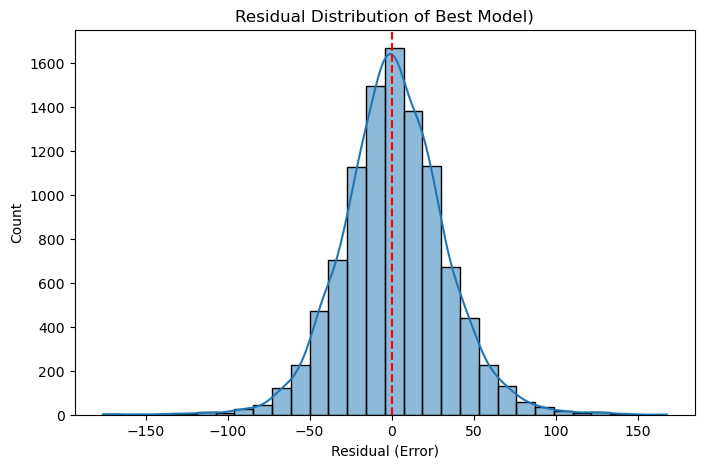

In [56]:
y_pred_best = trained_models[results_df.iloc[0]['Model']].predict(X_test_processed_df)
residuals = y_test - y_pred_best

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution of Best Model)")
plt.show()

✅ If residuals are centered around 0 and normally distributed, the model is working well even if R² is low. 
    - Centered around 0 means that the model isn't systematically overpredicting or underpredicting. 
    - Bell shaped means errors are random and normally distributed. 
    
In other words, the model is making errors, but they are expected and random rather than systematic.

Example: Imagine two students with identical backgrounds, education, and experience. One scores 300, and the other scores 600. Your model can’t predict this because other unknown factors influence the score (e.g., motivation, study habits, exposure to Dutch). This results in a lower R² because the model isn’t capturing 100% of the variability—even though it's making unbiased predictions.

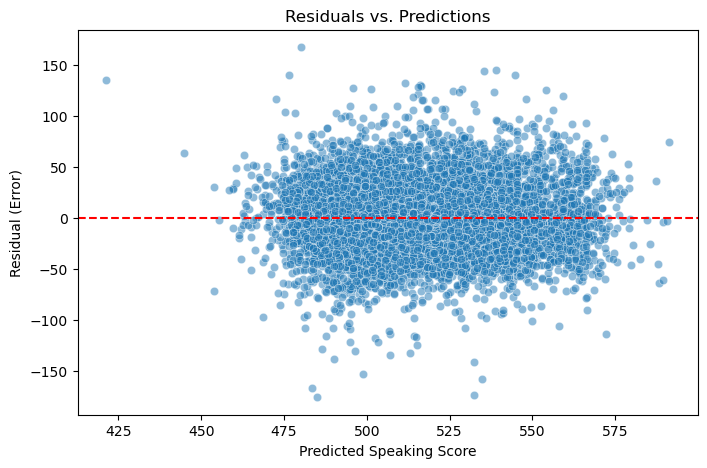

In [57]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Speaking Score")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs. Predictions")
plt.show()

From our domain knowledge, we suspect our model might have redundant data (for example L2 and Monolingual, or Family and FamilySpecific) and too much data (L1 vs FamilySpecific). Let's look into our features.

In [58]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

lasso_model = trained_models["Lasso Regression"]
lasso_coefficients = pd.DataFrame(lasso_model.coef_, index=X_train_processed_df.columns, columns=['Lasso Coefficient']).sort_values(['Lasso Coefficient'])

lasso_coefficients

Lasso Coefficient
AaA                                 -4.700
L2_Monolingual                      -2.435
C_Slovakia                           0.000
C_Slovenia                           0.000
C_Somalia                           -0.000
...                                    ...
L2_English                           1.398
L1_German                            3.258
Family_Indo-European                 6.633
Enroll                              11.483
FamilySpecific_Germanic             18.093

[266 rows x 1 columns]

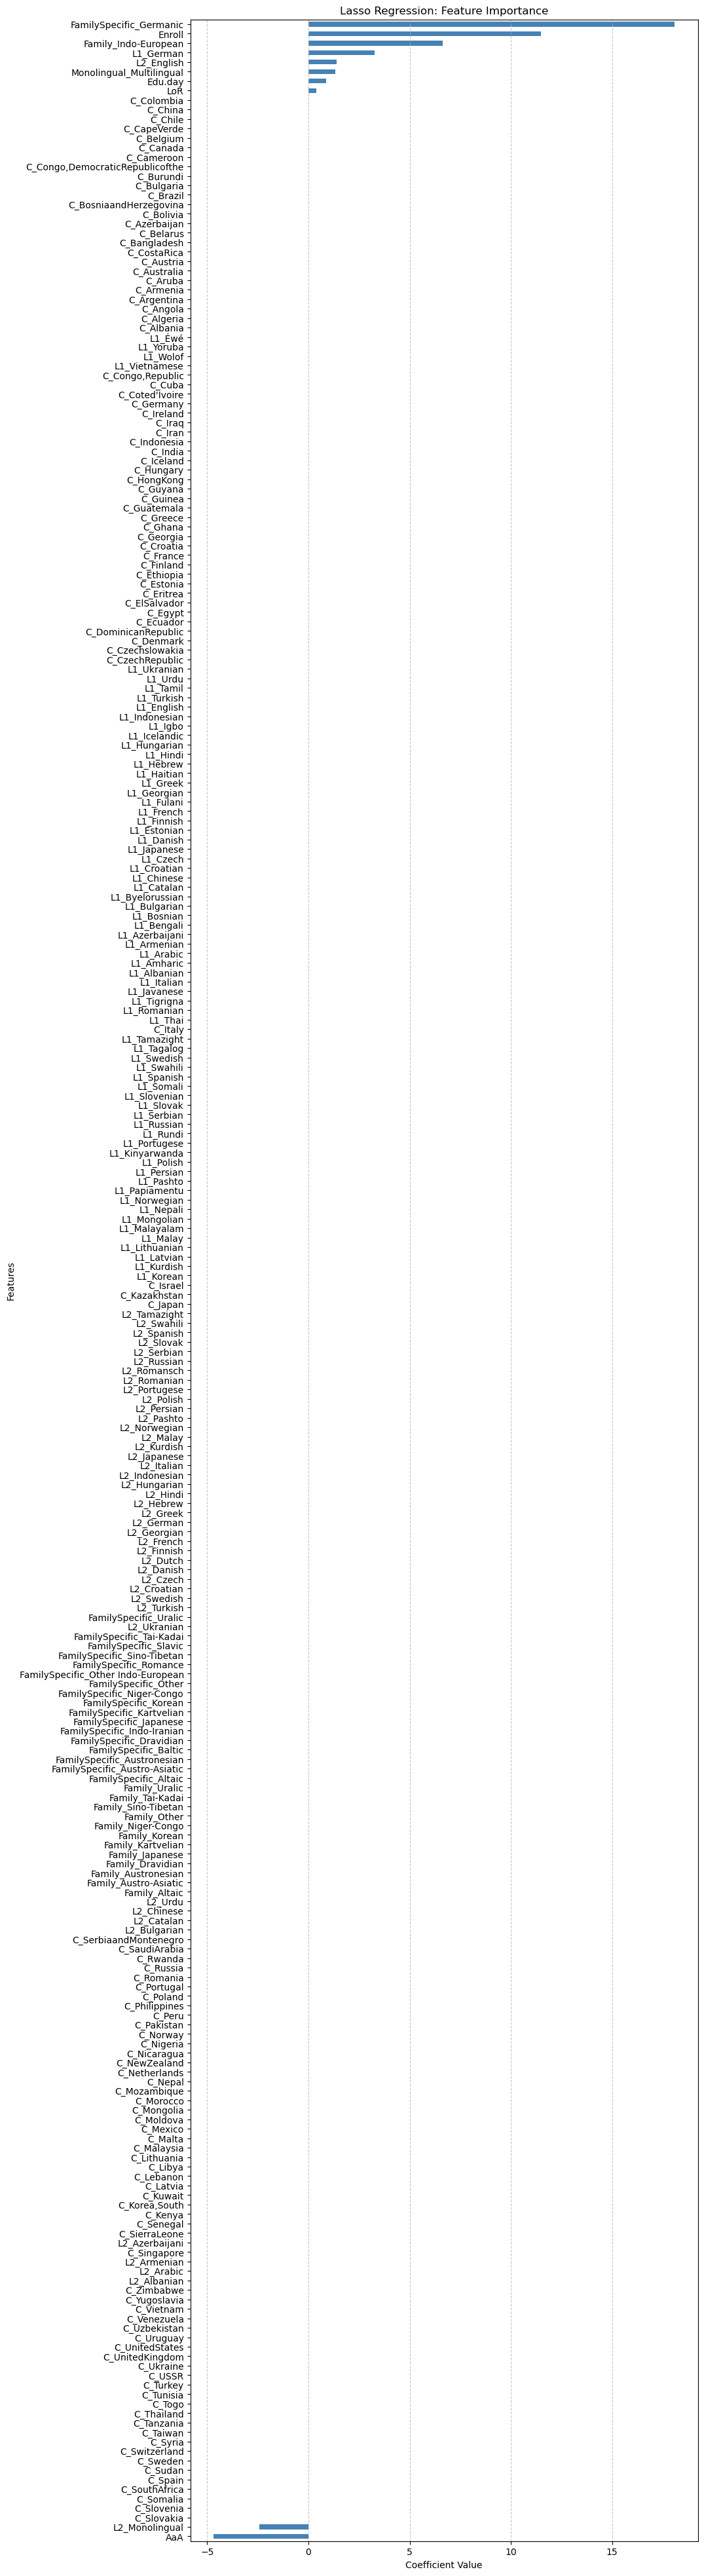

In [59]:
plt.figure(figsize=(10, 50))
lasso_coefficients["Lasso Coefficient"].plot(kind="barh", color="steelblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Lasso Regression: Feature Importance")
plt.grid(axis="x", linestyle="--", alpha=0.7)

In [60]:
lasso_coefficients_nonzero = lasso_coefficients[lasso_coefficients['Lasso Coefficient']!=0]
lasso_coefficients_nonzero["Lasso Coefficient"]

AaA                        -4.700
L2_Monolingual             -2.435
LoR                         0.375
Edu.day                     0.865
Monolingual_Multilingual    1.334
L2_English                  1.398
L1_German                   3.258
Family_Indo-European        6.633
Enroll                     11.483
FamilySpecific_Germanic    18.093
Name: Lasso Coefficient, dtype: float64

Lasso automatically selects features by shrinking less important ones to zero and confirms our suspicions. Categorical features like `Country` are not adding useful predictive value. `L1`, `L2`, `Family`, `FamilySpecific`, `Monolingual` have overlapping information.

For the sake of completeness, let's also look at the feature importance of the tree-based models.

In [61]:
tree_models = ["Random Forest", "Decision Tree", "Gradient Boosting", "Ada Boost"]

for model_name in tree_models:
    model = trained_models[model_name]  
    feature_importance = pd.Series(model.feature_importances_, index=X_train_processed_df.columns)
    
    print(f"Feature importance for {model_name}:")
    print(feature_importance.sort_values(ascending=False).head(10))  # Show top 10 features
    print("\n")

Feature importance for Random Forest:
Enroll                     0.254
AaA                        0.207
LoR                        0.155
Edu.day                    0.068
FamilySpecific_Germanic    0.063
L2_English                 0.014
L1_English                 0.010
L2_German                  0.009
Monolingual_Multilingual   0.008
L2_French                  0.008
dtype: float64


Feature importance for Decision Tree:
Enroll                     0.270
AaA                        0.208
LoR                        0.158
Edu.day                    0.066
FamilySpecific_Germanic    0.063
L2_English                 0.013
L1_English                 0.010
L2_German                  0.009
Family_Indo-European       0.009
Monolingual_Multilingual   0.008
dtype: float64


Feature importance for Gradient Boosting:
Enroll                     0.548
FamilySpecific_Germanic    0.158
AaA                        0.108
LoR                        0.031
L1_German                  0.019
Family_Indo-European   

## Reducing the number of features to aid with model interpretability 

In [62]:
X_train.head()

L1            C           L2  AaA  LoR  Edu.day         Family  \
28559    Persian  Afghanistan      Russian   42    3    4.000  Indo-European   
115    Afrikaans  SouthAfrica      English   28    1    3.000  Indo-European   
19415     German      Germany      English   28    3    1.000  Indo-European   
28961    Persian         Iran      English   20    2    4.000  Indo-European   
45917  Tamazight      Morocco  Monolingual   10   21    2.000   Afro-Asiatic   

       Enroll FamilySpecific   Monolingual  
28559      19   Indo-Iranian  Multilingual  
115        93       Germanic  Multilingual  
19415     101       Germanic  Multilingual  
28961      77   Indo-Iranian  Multilingual  
45917      49   Afro-Asiatic   Monolingual

In [63]:
def l_modified(language):
    if language == 'Monolingual':
        return language
    if language in language_family_dict.keys():
        if language_family_dict[language] == "Germanic":
            return "Germanic"
        else:
            return 'Indo-European'
    return 'Non-Indo-European'

In [64]:
to_drop = ['C', 'Family', 'Monolingual', 'FamilySpecific']
X_train_new = X_train.drop(to_drop, axis=1)
X_train_new['L1_new'] = X_train_new['L1'].apply(lambda row: l_modified(row))
X_train_new['L2_new'] = X_train_new['L2'].apply(lambda row: l_modified(row))
X_train_new = X_train_new.drop(['L1','L2'], axis=1)
X_train_new.sample(5)

AaA  LoR  Edu.day  Enroll             L1_new         L2_new
41959   22    4    1.000       8  Non-Indo-European    Monolingual
27499   26    2    4.000      19      Indo-European  Indo-European
28749   30    4    4.000      19      Indo-European       Germanic
40591   24    3    3.000      85      Indo-European    Monolingual
44976   28    1    4.000      85      Indo-European       Germanic

In [65]:
to_drop = ['C', 'Family', 'Monolingual', 'FamilySpecific']
X_test_new = X_test.drop(to_drop, axis=1)
X_test_new['L1_new'] = X_test_new['L1'].apply(lambda row: l_modified(row))
X_test_new['L2_new'] = X_test_new['L2'].apply(lambda row: l_modified(row))
X_test_new = X_test_new.drop(['L1','L2'], axis=1)
X_test_new.sample(5)

AaA  LoR  Edu.day  Enroll             L1_new    L2_new
19807   36    1    4.000      94           Germanic  Germanic
22756   28    0    4.000      64  Non-Indo-European  Germanic
48086   23    1    4.000      79  Non-Indo-European  Germanic
32940   29    4    3.000     106      Indo-European  Germanic
40648   23    1    3.000      85      Indo-European  Germanic

In [66]:
categorical_columns = X_train_new.select_dtypes(include=['object', 'category']).columns
numerical_columns = X_train_new.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_columns),  # Standardize numerical features
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns)  # One-hot encode categorical features
    ])

X_train_processed = preprocessor.fit_transform(X_train_new)
X_test_processed = preprocessor.transform(X_test_new)

# The names of the numerical columns do not change after the transformation
numerical_column_names = numerical_columns

# The get_feature_names_out method generates the names of the new columns created by OneHotEncoder for categorical columns
categorical_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine the names of numerical and categorical columns into a list
all_column_names = list(numerical_column_names) + list(categorical_column_names)

In [67]:
# Convert the matrix into a DataFrame with the column names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_column_names)

# Display the first few rows of the processed DataFrame
X_train_processed_df.head()

AaA    LoR  Edu.day  Enroll  L1_new_Indo-European  \
0  2.000  0.000    1.000  -2.030                 1.000   
1  0.250 -1.000    0.000   0.212                 0.000   
2  0.250  0.000   -2.000   0.455                 0.000   
3 -0.750 -0.500    1.000  -0.273                 1.000   
4 -2.000  9.000   -1.000  -1.121                 0.000   

   L1_new_Non-Indo-European  L2_new_Indo-European  L2_new_Monolingual  \
0                     0.000                 1.000               0.000   
1                     0.000                 0.000               0.000   
2                     0.000                 0.000               0.000   
3                     0.000                 0.000               0.000   
4                     1.000                 0.000               1.000   

   L2_new_Non-Indo-European  
0                     0.000  
1                     0.000  
2                     0.000  
3                     0.000  
4                     0.000

In [68]:
# Convert the matrix into a DataFrame with the column names
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_column_names)

# Display the first few rows of the processed test DataFrame
X_test_processed_df.head()

AaA    LoR  Edu.day  Enroll  L1_new_Indo-European  \
0 -0.750 -1.000    0.000   0.455                 0.000   
1  0.875  0.500    0.000  -2.030                 1.000   
2 -0.125  0.500    0.000  -0.212                 0.000   
3  2.500  0.500    1.000  -1.182                 0.000   
4  0.875 -1.000    1.000   0.576                 0.000   

   L1_new_Non-Indo-European  L2_new_Indo-European  L2_new_Monolingual  \
0                     0.000                 0.000               0.000   
1                     0.000                 0.000               1.000   
2                     1.000                 0.000               0.000   
3                     1.000                 0.000               0.000   
4                     0.000                 0.000               1.000   

   L2_new_Non-Indo-European  
0                     0.000  
1                     0.000  
2                     0.000  
3                     1.000  
4                     0.000

In [69]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Huber Regressor": HuberRegressor(max_iter=500),
    "Support Vector Machine": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ada Boost": AdaBoostRegressor(),
    "Multi-layer Perceptron": MLPRegressor(max_iter=1000, batch_size=32, early_stopping=True)

}

In [70]:
# Define cross-validation strategy (5-fold CV)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []
trained_models = {}

for name, model in models.items():
    print(f"Training {model} ...")
    
    # Perform cross-validation and compute RMSE for training
    cv_rmse_train = np.sqrt(-cross_val_score(model, X_train_processed_df, y_train, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1))
    cv_r2_train = cross_val_score(model, X_train_processed_df, y_train, scoring="r2", cv=cv, n_jobs=-1)

    # Train the model on full training data and predict on the test set
    model.fit(X_train_processed_df, y_train)
    y_pred = model.predict(X_test_processed_df)
    
    # Store trained model
    trained_models[name] = model

    # Compute test metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_test = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": name, 
        "RMSE train (CV Mean)": np.mean(cv_rmse_train), 
        "R² Score train (CV Mean)": np.mean(cv_r2_train),
        "RMSE test": rmse_test, 
        "R² Score test": r2_test
    })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).sort_values(by=["RMSE test", "R² Score test"], ascending=[True, False])

Training LinearRegression() ...
Training Lasso() ...
Training HuberRegressor(max_iter=500) ...
Training SVR() ...
Training DecisionTreeRegressor() ...
Training RandomForestRegressor(n_jobs=-1) ...
Training GradientBoostingRegressor() ...
Training AdaBoostRegressor() ...
Training MLPRegressor(batch_size=32, early_stopping=True, max_iter=1000) ...


In [71]:
results_df

Model  RMSE train (CV Mean)  R² Score train (CV Mean)  \
6       Gradient Boosting                31.523                     0.305   
8  Multi-layer Perceptron                31.788                     0.295   
3  Support Vector Machine                32.184                     0.276   
0       Linear Regression                32.455                     0.263   
2         Huber Regressor                32.472                     0.262   
1        Lasso Regression                33.148                     0.231   
5           Random Forest                34.215                     0.181   
7               Ada Boost                34.557                     0.189   
4           Decision Tree                41.007                    -0.173   

   RMSE test  R² Score test  
6     31.974          0.304  
8     32.382          0.286  
3     32.694          0.272  
0     33.168          0.251  
2     33.182          0.250  
1     33.856          0.220  
5     34.395          0.194  
7     34.799          0.175  
4     39.946         -0.087

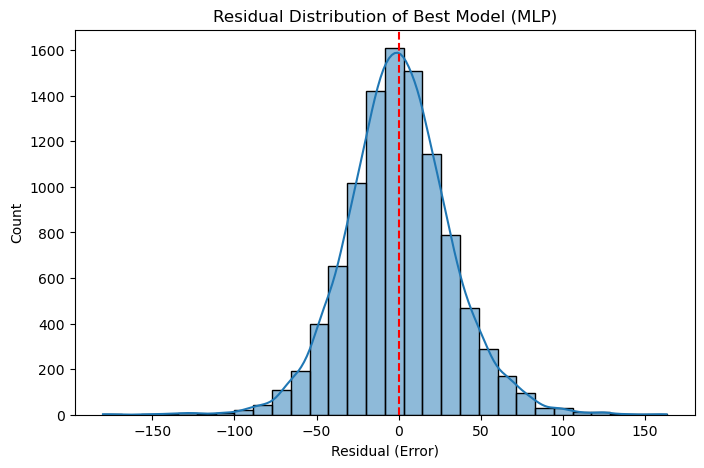

In [72]:
y_pred_best = trained_models[results_df.iloc[0]['Model']].predict(X_test_processed_df)
residuals = y_test - y_pred_best

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution of Best Model (MLP)")
plt.show()

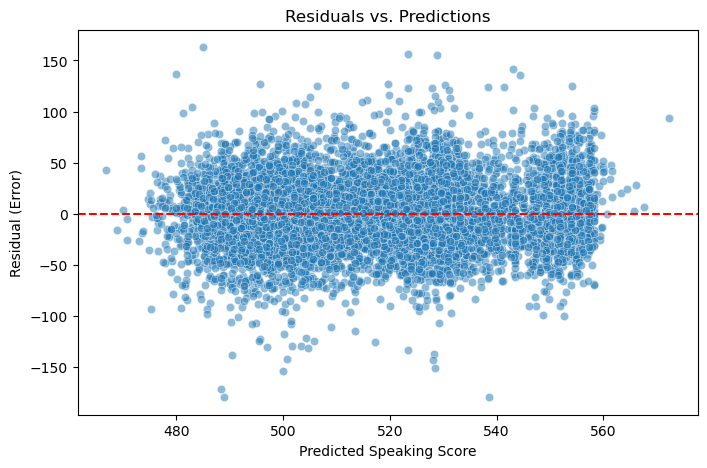

In [73]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Speaking Score")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs. Predictions")
plt.show()

In [75]:
tree_models = ["Random Forest", "Decision Tree", "Gradient Boosting", "Ada Boost"]

for model_name in tree_models:
    model = trained_models[model_name]  
    feature_importance = pd.Series(model.feature_importances_, index=X_train_processed_df.columns)
    
    print(f"Feature importance for {model_name}:")
    print(feature_importance.sort_values(ascending=False))  # Show top 10 features
    print("\n")

Feature importance for Random Forest:
Enroll                     0.369
AaA                        0.233
LoR                        0.182
Edu.day                    0.080
L1_new_Indo-European       0.046
L1_new_Non-Indo-European   0.031
L2_new_Monolingual         0.023
L2_new_Indo-European       0.022
L2_new_Non-Indo-European   0.013
dtype: float64


Feature importance for Decision Tree:
Enroll                     0.379
AaA                        0.223
LoR                        0.182
Edu.day                    0.078
L1_new_Indo-European       0.047
L1_new_Non-Indo-European   0.034
L2_new_Monolingual         0.022
L2_new_Indo-European       0.021
L2_new_Non-Indo-European   0.014
dtype: float64


Feature importance for Gradient Boosting:
Enroll                     0.604
L1_new_Indo-European       0.114
AaA                        0.109
L1_new_Non-Indo-European   0.079
LoR                        0.037
L2_new_Monolingual         0.034
Edu.day                    0.012
L2_new_Indo-European   

# 6. Hyperparameter tuning 

In [76]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define hyperparameter grids
param_grids = {
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "Multi-layer Perceptron": {
        "hidden_layer_sizes": [(50,), (100,), (50,50)],
        "activation": ["relu", "tanh"],
        "solver": ["adam"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 2, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    }
}

# Models dictionary
models = {
    "Gradient Boosting": GradientBoostingRegressor(),
    "Multi-layer Perceptron": MLPRegressor(max_iter=1000),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_jobs=-1)
}

best_models = {}
best_params = {}

results_hyperparameter = []

for name, model in models.items():
    print(f"Tuning {name}...")
    search = GridSearchCV(model, param_grid=param_grids[name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    search.fit(X_train_processed_df, y_train)
    
    best_models[name] = search.best_estimator_
    best_params[name] = search.best_params_
    
    # Compute RMSE and R² on train and test sets
    y_train_pred = search.best_estimator_.predict(X_train_processed_df)
    y_test_pred = search.best_estimator_.predict(X_test_processed_df)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    
    results_hyperparameter.append({
        "Model": name,
        "Best Params": search.best_params_,
        "RMSE Train": rmse_train,
        "R² Train": r2_train,
        "RMSE Test": rmse_test,
        "R² Test": r2_test
    })
    
    print(f"Best parameters for {name}: {search.best_params_}")
    print("-----------------------------------")

# Store results in a pandas DataFrame
results_hyp_df = pd.DataFrame(results_hyperparameter)

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
-----------------------------------
Tuning Multi-layer Perceptron...


/Users/vivianamarquez/anaconda3/envs/c1_da/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vivianamarquez/anaconda3/envs/c1_da/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for Multi-layer Perceptron: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
-----------------------------------
Tuning Random Forest...


/Users/vivianamarquez/anaconda3/envs/c1_da/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
-----------------------------------
Tuning XGBoost...


/Users/vivianamarquez/anaconda3/envs/c1_da/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
-----------------------------------


In [77]:
results_hyp_df.sort_values(['RMSE Test', 'R² Test'], ascending=[True,False])

Model                                        Best Params  \
0       Gradient Boosting  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...   
3                 XGBoost  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...   
2           Random Forest  {'max_depth': 10, 'min_samples_split': 10, 'n_...   
1  Multi-layer Perceptron  {'activation': 'tanh', 'hidden_layer_sizes': (...   

   RMSE Train  R² Train  RMSE Test  R² Test  
0      30.640     0.343     31.573    0.321  
3      30.453     0.351     31.627    0.319  
2      29.836     0.378     31.799    0.311  
1      31.445     0.309     32.216    0.293

Given that we didn't improve our results by a lot, let's look at Linear Regression again since it provides better interpretability.

In [78]:
LinReg = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_rmse_train = np.sqrt(-cross_val_score(LinReg, X_train_processed_df, y_train, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1))
cv_r2_train = cross_val_score(LinReg, X_train_processed_df, y_train, scoring="r2", cv=cv, n_jobs=-1)

LinReg.fit(X_train_processed_df, y_train)
y_pred = LinReg.predict(X_test_processed_df)
    
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
    
LinRegResults = {
        "Model": "Linear Regression", 
        "RMSE train (CV Mean)": np.mean(cv_rmse_train), 
        "R² Score train (CV Mean)": np.mean(cv_r2_train),
        "RMSE test": rmse_test, 
        "R² Score test": r2_test
    }

In [79]:
LinRegResults

{'Model': 'Linear Regression',
 'RMSE train (CV Mean)': 32.4554594087309,
 'R² Score train (CV Mean)': 0.26323414302112913,
 'RMSE test': 33.16816287492591,
 'R² Score test': 0.25089724560480386}

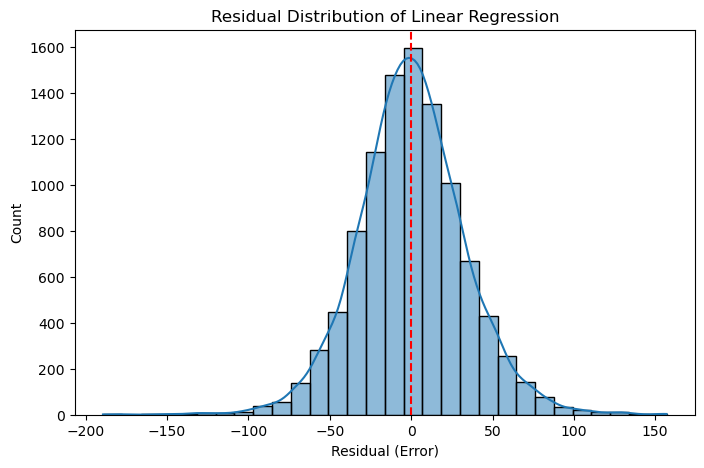

In [80]:
y_pred_best = LinReg.predict(X_test_processed_df)
residuals = y_test - y_pred_best

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Error)")
plt.title("Residual Distribution of Linear Regression")
plt.show()

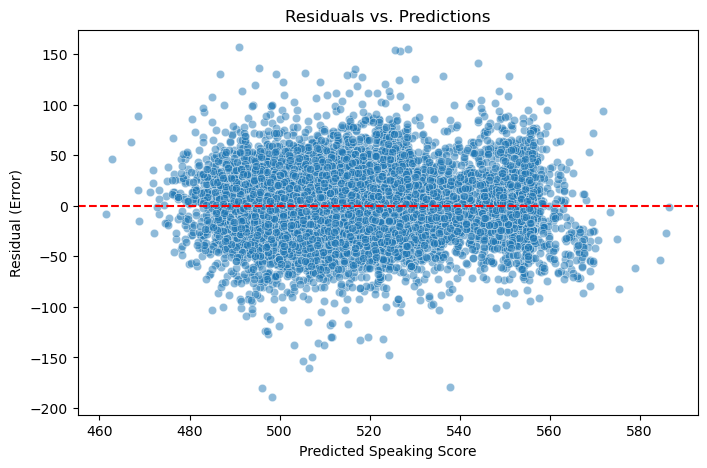

In [81]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Speaking Score")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs. Predictions")
plt.show()

In [82]:
y_mean_pred = np.full_like(y_test, y_train.mean())  # Predicting the mean for all test samples
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_mean_pred))
r2_baseline = r2_score(y_test, y_mean_pred)

print(f"Baseline RMSE: {rmse_baseline}")
print(f"Baseline R²: {r2_baseline}")

Baseline RMSE: 38.3260735738517
Baseline R²: -0.0002008449585109151


In [83]:
coef_df = pd.DataFrame({"Feature": X_train_processed_df.columns, "Coefficient": LinReg.coef_})
coef_df = coef_df.sort_values(by="Coefficient", key=abs, ascending=False)  # Sort by absolute value
coef_df

Feature  Coefficient
5  L1_new_Non-Indo-European      -36.019
4      L1_new_Indo-European      -25.875
7        L2_new_Monolingual      -13.925
3                    Enroll       10.847
8  L2_new_Non-Indo-European      -10.143
0                       AaA       -6.271
6      L2_new_Indo-European       -4.218
2                   Edu.day        2.177
1                       LoR        0.848

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_processed_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_processed_df.values, i) for i in range(X_train_processed_df.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)  # Features with highest multicollinearity

Feature   VIF
5  L1_new_Non-Indo-European 1.521
6      L2_new_Indo-European 1.304
3                    Enroll 1.286
4      L1_new_Indo-European 1.286
7        L2_new_Monolingual 1.228
1                       LoR 1.118
0                       AaA 1.099
8  L2_new_Non-Indo-European 1.091
2                   Edu.day 1.087

In [1]:
import plotly.express as px

fig = px.scatter_3d(df, 
                     x="LoR", 
                     y="Enroll", 
                     z="Speaking", 
                     color="Speaking",  
                     color_continuous_scale="Plasma",  
                     opacity=0.8, 
                     size_max=2,
                     title="3D Relationship: LoR, Enroll & Speaking Proficiency")

fig.update_layout(
    width=1000,  # Increase width of the plot
    height=800,  # Increase height of the plot
    scene=dict(
        xaxis_title="Length of Residence (LoR)",
        yaxis_title="Enroll (Language Courses)",
        zaxis_title="Speaking Proficiency Score"
    )
)

fig.show()

NameError: name 'df' is not defined